In [512]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv(r'datasets\bangalore_cleaned.csv')
df

,BHK,sector,price,price_persqft,SuperArea,floor,Furnishing,facing,Car_Parking,Bathroom,Balcony,overlooking,city
0,3,Panathur,2.25,13966.0,1611.0,10+,Unfurnished,East,Available,2,1,Garden/Park,Bangalore
1,3,Panathur,2.13,12909.0,1650.0,10+,Unfurnished,East,Available,3,2,Garden/Park,Bangalore
2,3,Thanisandra,1.37,9648.0,1420.0,8,Unfurnished,North - East,Available,2,1,"Garden/Park, Pool",Bangalore
3,3,Panathur,1.62,11000.0,1473.0,5,Unfurnished,North - East,Available,2,1,"Garden/Park, Main Road",Bangalore
4,4,Whitefield,3.93,15023.0,2616.0,10+,Unfurnished,East,Available,3,2,Garden/Park,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,3,others,1.74,10578.0,1645.0,2,Unfurnished,North - East,May be not,3,2,Garden/Park,Bangalore
1436,3,others,1.16,5859.0,1980.0,7,Unfurnished,East,Available,3,1,"Garden/Park, Pool, Main Road",Bangalore
1437,3,others,1.70,11732.0,1449.0,1,Semi-Furnished,East,May be not,2,3,Main Road,Bangalore
1438,3,others,2.80,12174.0,2300.0,3,Unfurnished,East,May be not,3,2,NaN,Bangalore


In [514]:
df.head()

,BHK,sector,price,price_persqft,SuperArea,floor,Furnishing,facing,Car_Parking,Bathroom,Balcony,overlooking,city
0,3,Panathur,2.25,13966.0,1611.0,10+,Unfurnished,East,Available,2,1,Garden/Park,Bangalore
1,3,Panathur,2.13,12909.0,1650.0,10+,Unfurnished,East,Available,3,2,Garden/Park,Bangalore
2,3,Thanisandra,1.37,9648.0,1420.0,8,Unfurnished,North - East,Available,2,1,"Garden/Park, Pool",Bangalore
3,3,Panathur,1.62,11000.0,1473.0,5,Unfurnished,North - East,Available,2,1,"Garden/Park, Main Road",Bangalore
4,4,Whitefield,3.93,15023.0,2616.0,10+,Unfurnished,East,Available,3,2,Garden/Park,Bangalore


In [515]:
df.shape

(1440, 13)

In [516]:
df.isna().sum()

BHK                0
sector             0
price              0
price_persqft      1
SuperArea          1
floor             80
Furnishing        16
facing           567
Car_Parking        0
Bathroom           9
Balcony          429
overlooking      677
city               0
dtype: int64

In [517]:
cols=['price_persqft','SuperArea']
for col in cols:
    df[col]=df[col].fillna(df[col].mean())

In [518]:
cols=['floor','Furnishing','facing','Balcony','Bathroom','overlooking']

for col in cols:
    df[col]=df[col].fillna(df[df[col].notna()][col].mode()[0])

In [519]:
df.isna().sum()

BHK              0
sector           0
price            0
price_persqft    0
SuperArea        0
floor            0
Furnishing       0
facing           0
Car_Parking      0
Bathroom         0
Balcony          0
overlooking      0
city             0
dtype: int64

In [520]:
df.duplicated().sum()

5

In [521]:
df.drop_duplicates(inplace=True)

In [522]:
df.dtypes

BHK               object
sector            object
price            float64
price_persqft    float64
SuperArea        float64
floor             object
Furnishing        object
facing            object
Car_Parking       object
Bathroom          object
Balcony           object
overlooking       object
city              object
dtype: object

In [523]:
df['BHK'].unique()

array(['3', '4', '2', '4+', '1'], dtype=object)

In [524]:
df['BHK']=df['BHK'].replace(to_replace='4+',value='5')


In [525]:
df['sector'].unique()

array(['Panathur', 'Thanisandra', 'Whitefield', 'others', 'Sarjapur Road',
       'Sarjapura', 'Thanisandra Main Road', 'Gunjur', 'Chandapura',
       'Bagaluru', 'Yelahanka', 'Outer Ring Road', 'Krishnarajapura',
       'Jakkur', 'JP Nagar', 'Hennur Main Road', 'Hebbal', 'Jayanagar',
       'HSR Layout', 'Kengeri', 'Banaswadi'], dtype=object)

In [526]:
df['floor'].unique()

array(['10+', '8', '5', '10', '2', '9', '3', '7', '4', '1', '6'],
      dtype=object)

In [527]:
df['floor']=df['floor'].replace(to_replace='10+',value='11')


In [528]:
df['floor'].unique()

array(['11', '8', '5', '10', '2', '9', '3', '7', '4', '1', '6'],
      dtype=object)

In [529]:

df['Furnishing'].unique()

array(['Unfurnished', 'Semi-Furnished', 'Furnished'], dtype=object)

In [530]:
df['facing'].unique()

array(['East', 'North - East', 'North', 'West', 'North - West', 'South',
       'South - East', 'South -West'], dtype=object)

In [531]:
df['Car_Parking'].unique()

array(['Available', 'May be not'], dtype=object)

In [532]:
df['Bathroom'].unique()

array(['2', '3', '4', '4+', '1'], dtype=object)

In [533]:
df['Bathroom']=df['Bathroom'].replace(to_replace='4+',value='5')


In [534]:
df['Bathroom'].unique()

array(['2', '3', '4', '5', '1'], dtype=object)

In [535]:
df['Balcony'].unique()


array(['1', '2', '3', '4', '4+'], dtype=object)

In [536]:
df['Balcony']=df['Balcony'].replace(to_replace='4+',value='5')

In [537]:
df['Balcony'].unique()

array(['1', '2', '3', '4', '5'], dtype=object)

In [538]:
df['overlooking'].unique()

array(['Garden/Park', 'Garden/Park, Pool', 'Garden/Park, Main Road',
       'Garden/Park, Pool, Main Road', 'Pool, Garden/Park, Main Road',
       'Pool, Main Road', 'Pool', 'Main Road', 'Pool, Garden/Park',
       'Main Road, Garden/Park, Pool', 'Main Road, Garden/Park',
       'Pool, Main Road, Garden/Park', 'Main Road, Pool'], dtype=object)

In [539]:
df['city'].unique()

array(['Bangalore'], dtype=object)

In [540]:
#drop the city feture because it can hold only one unique value
df.drop('city',axis=1,inplace=True)

In [541]:
#Drop sector and overlook because in which more unique value
col=['sector','overlooking']
df.drop(col,axis=1,inplace=True)

In [542]:
df.head()

,BHK,price,price_persqft,SuperArea,floor,Furnishing,facing,Car_Parking,Bathroom,Balcony
0,3,2.25,13966.0,1611.0,11,Unfurnished,East,Available,2,1
1,3,2.13,12909.0,1650.0,11,Unfurnished,East,Available,3,2
2,3,1.37,9648.0,1420.0,8,Unfurnished,North - East,Available,2,1
3,3,1.62,11000.0,1473.0,5,Unfurnished,North - East,Available,2,1
4,4,3.93,15023.0,2616.0,11,Unfurnished,East,Available,3,2


In [543]:
df.dtypes

BHK               object
price            float64
price_persqft    float64
SuperArea        float64
floor             object
Furnishing        object
facing            object
Car_Parking       object
Bathroom          object
Balcony           object
dtype: object

In [544]:
cols=['BHK','floor','Bathroom','Balcony']
for col in cols:
    df[col]=df[col].astype(int)

In [545]:
df.dtypes

BHK                int32
price            float64
price_persqft    float64
SuperArea        float64
floor              int32
Furnishing        object
facing            object
Car_Parking       object
Bathroom           int32
Balcony            int32
dtype: object

In [546]:
cols=df.dtypes[df.dtypes=='object'].index

df_dummy=pd.get_dummies(df[cols],drop_first=True,dtype=int)


In [547]:
df.drop(cols,axis=1,inplace=True)
df=pd.concat([df,df_dummy],axis=1)

In [548]:
df

,BHK,price,price_persqft,SuperArea,floor,Bathroom,Balcony,Furnishing_Semi-Furnished,Furnishing_Unfurnished,facing_North,facing_North - East,facing_North - West,facing_South,facing_South - East,facing_South -West,facing_West,Car_Parking_May be not
0,3,2.25,13966.0,1611.0,11,2,1,0,1,0,0,0,0,0,0,0,0
1,3,2.13,12909.0,1650.0,11,3,2,0,1,0,0,0,0,0,0,0,0
2,3,1.37,9648.0,1420.0,8,2,1,0,1,0,1,0,0,0,0,0,0
3,3,1.62,11000.0,1473.0,5,2,1,0,1,0,1,0,0,0,0,0,0
4,4,3.93,15023.0,2616.0,11,3,2,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,3,1.74,10578.0,1645.0,2,3,2,0,1,0,1,0,0,0,0,0,1
1436,3,1.16,5859.0,1980.0,7,3,1,0,1,0,0,0,0,0,0,0,0
1437,3,1.70,11732.0,1449.0,1,2,3,1,0,0,0,0,0,0,0,0,1
1438,3,2.80,12174.0,2300.0,3,3,2,0,1,0,0,0,0,0,0,0,1


In [549]:
df.dtypes

BHK                            int32
price                        float64
price_persqft                float64
SuperArea                    float64
floor                          int32
Bathroom                       int32
Balcony                        int32
Furnishing_Semi-Furnished      int32
Furnishing_Unfurnished         int32
facing_North                   int32
facing_North - East            int32
facing_North - West            int32
facing_South                   int32
facing_South - East            int32
facing_South -West             int32
facing_West                    int32
Car_Parking_May be not         int32
dtype: object

<Axes: >

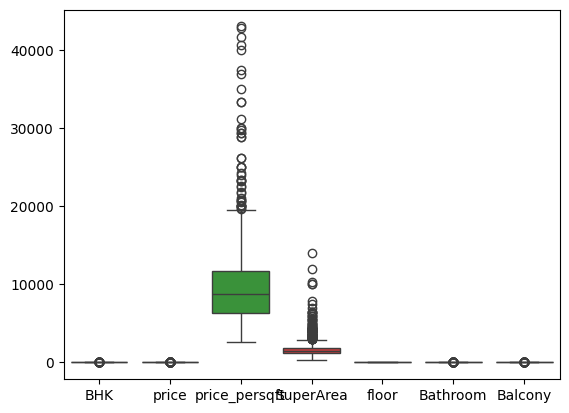

In [550]:
cols=['BHK','price','price_persqft','SuperArea','floor','Bathroom','Balcony']
sns.boxplot(df[cols])

In [551]:
col=['BHK','price','price_persqft','SuperArea','floor','Bathroom','Balcony']

for col in col:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)

    IQR=Q3-Q1
    lowwer_fence=Q1-1.5*IQR
    upper_fence=Q3+1.5*IQR

    df[col]=np.where(((pd.Series(df[col]))>=upper_fence) | ((pd.Series(df[col]))<=lowwer_fence), df[col].median(),df[col])

In [552]:
col=['BHK','price','price_persqft','SuperArea','floor','Bathroom','Balcony']

for col in col:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)

    IQR=Q3-Q1
    lowwer_fence=Q1-1.5*IQR
    upper_fence=Q3+1.5*IQR

    df[col]=np.where(((pd.Series(df[col]))>=upper_fence) | ((pd.Series(df[col]))<=lowwer_fence), df[col].median(),df[col])

<Axes: >

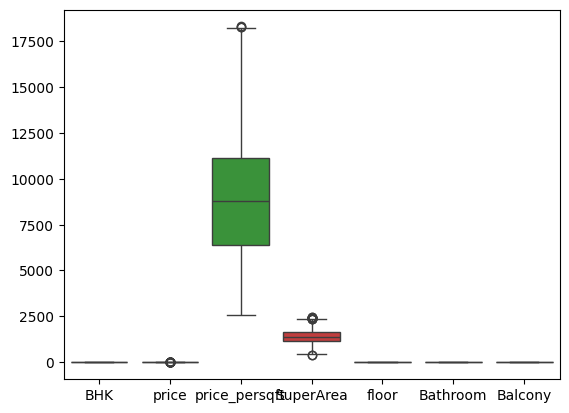

In [553]:
cols=['BHK','price','price_persqft','SuperArea','floor','Bathroom','Balcony']
sns.boxplot(df[cols])

In [554]:
x=df.drop('price',axis=1)
y=df['price']
x

,BHK,price_persqft,SuperArea,floor,Bathroom,Balcony,Furnishing_Semi-Furnished,Furnishing_Unfurnished,facing_North,facing_North - East,facing_North - West,facing_South,facing_South - East,facing_South -West,facing_West,Car_Parking_May be not
0,3.0,13966.0,1611.0,11.0,2.0,1.0,0,1,0,0,0,0,0,0,0,0
1,3.0,12909.0,1650.0,11.0,3.0,2.0,0,1,0,0,0,0,0,0,0,0
2,3.0,9648.0,1420.0,8.0,2.0,1.0,0,1,0,1,0,0,0,0,0,0
3,3.0,11000.0,1473.0,5.0,2.0,1.0,0,1,0,1,0,0,0,0,0,0
4,4.0,15023.0,1400.0,11.0,3.0,2.0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,3.0,10578.0,1645.0,2.0,3.0,2.0,0,1,0,1,0,0,0,0,0,1
1436,3.0,5859.0,1980.0,7.0,3.0,1.0,0,1,0,0,0,0,0,0,0,0
1437,3.0,11732.0,1449.0,1.0,2.0,3.0,1,0,0,0,0,0,0,0,0,1
1438,3.0,12174.0,2300.0,3.0,3.0,2.0,0,1,0,0,0,0,0,0,0,1


In [555]:
y

0       2.25
1       2.13
2       1.37
3       1.62
4       1.21
        ... 
1435    1.74
1436    1.16
1437    1.70
1438    2.80
1439    1.25
Name: price, Length: 1435, dtype: float64

In [556]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [557]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [558]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)

In [559]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
y_pred=dtr.predict(x_test)
y_pred

array([1.4  , 1.2  , 1.4  , 1.21 , 0.99 , 1.11 , 1.   , 0.75 , 0.79 ,
       2.85 , 1.75 , 0.95 , 0.75 , 1.1  , 1.4  , 1.65 , 0.538, 1.21 ,
       1.77 , 1.89 , 1.55 , 2.   , 2.6  , 1.3  , 1.5  , 1.55 , 1.7  ,
       1.1  , 0.55 , 2.6  , 0.33 , 1.75 , 0.495, 1.2  , 0.75 , 0.9  ,
       1.18 , 1.05 , 0.9  , 1.6  , 0.25 , 2.   , 1.21 , 2.25 , 0.5  ,
       1.2  , 0.9  , 1.08 , 1.2  , 1.35 , 0.42 , 1.21 , 0.745, 0.95 ,
       1.2  , 1.95 , 1.21 , 0.75 , 0.68 , 1.21 , 1.85 , 1.2  , 1.39 ,
       0.4  , 1.21 , 1.2  , 1.08 , 0.85 , 3.   , 2.7  , 0.9  , 0.95 ,
       1.35 , 1.1  , 1.55 , 2.58 , 1.6  , 0.47 , 1.2  , 0.695, 1.1  ,
       1.9  , 1.21 , 1.58 , 0.48 , 1.8  , 2.48 , 1.4  , 0.9  , 0.89 ,
       2.15 , 1.05 , 1.25 , 0.902, 0.65 , 0.6  , 1.5  , 1.4  , 1.15 ,
       1.8  , 1.5  , 1.2  , 3.   , 0.96 , 1.   , 2.1  , 1.89 , 0.6  ,
       0.55 , 0.745, 1.8  , 1.7  , 1.4  , 0.78 , 0.66 , 2.5  , 1.2  ,
       1.1  , 0.583, 1.4  , 1.21 , 1.11 , 0.78 , 0.68 , 1.25 , 1.21 ,
       0.48 , 1.35 ,

In [560]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.08521391134267708

In [561]:
#hyperpaameter Tuning
parameter={'criterion':['squared_error','absolute_error','friedman_mse','poisson'],'splitter':['best','random'],'max_depth':[1,2,3,4,5,6,7,8],'max_features':['auto','sqrt','log2']}
from sklearn.model_selection import  GridSearchCV
grid_search=GridSearchCV(dtr,param_grid=parameter,cv=5,verbose=3)
grid_search.fit(x_train,y_train)


Fitting 5 folds for each of 192 candidates, totalling 960 fits
[CV 1/5] END criterion=squared_error, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 4/5] EN

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             verbose=3)

In [562]:
grid_search.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'best'}

In [563]:
best_model=grid_search.best_estimator_
best_model

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5,
                      max_features='log2')

In [564]:
y_pred_tuned=best_model.predict(x_test)
y_pred_tuned

array([0.79034177, 1.39186047, 0.97383333, 1.86975   , 1.39186047,
       0.97383333, 1.37666667, 1.1888    , 0.97383333, 1.86975   ,
       1.55101695, 0.89225806, 0.92672039, 1.39186047, 1.39186047,
       1.39186047, 0.92672039, 1.39186047, 1.86975   , 1.86975   ,
       1.18571429, 1.39186047, 0.92672039, 0.92672039, 0.92672039,
       1.18571429, 1.39186047, 0.92672039, 0.43214286, 1.86975   ,
       0.92672039, 1.86975   , 0.92672039, 1.39186047, 0.92672039,
       0.92672039, 1.18571429, 0.92672039, 0.92672039, 1.86975   ,
       0.92672039, 1.39186047, 1.86975   , 1.48444444, 0.79034177,
       0.89225806, 1.39186047, 0.92672039, 1.55101695, 1.86975   ,
       0.92672039, 1.86975   , 0.92672039, 0.92672039, 1.1888    ,
       1.86975   , 1.86975   , 0.79034177, 0.79034177, 1.86975   ,
       0.92672039, 0.92672039, 0.79034177, 0.92672039, 1.86975   ,
       1.39186047, 0.92672039, 0.89225806, 1.86975   , 1.39186047,
       0.92672039, 0.89225806, 1.39186047, 1.1888    , 1.55101

In [565]:
r2_score(y_test,y_pred_tuned)

0.3978601635872028